In [2]:
import pandas as pd
df=pd.read_csv('highly_skewed_income_data.csv')
df.head()

,income
0,23463.404499
1,150506.071546
2,65837.284677
3,45647.127689
4,8481.243523


In [3]:
sample1=df.sample(n=5,random_state=42)
sample1

,income
6252,20585.003687
4684,74695.158274
1731,48894.457141
4742,1811.950146
4521,43032.996438


In [8]:
from scipy.stats import norm
import numpy as np

sample=df.sample(n=40,random_state=42)

mean=sample.mean()
std=sample.std()
n=40
se=std/np.sqrt(n)

stat,p=1-norm.cdf(mean,n,se)
p

ValueError: not enough values to unpack (expected 2, got 1)

In [4]:
import pandas as pd

df=pd.read_csv('customer_satisfaction_sample (1).csv')
df.head()

,CustomerID,SatisfactionScore,DeliveryTimeDays,PurchaseAmount,Gender
0,1,2,5.95,1435.55,Male
1,2,4,4.76,1598.51,Female
2,3,4,6.27,2696.80,Male
3,4,4,8.52,2553.07,Female
4,5,4,4.61,1983.35,Female


In [13]:
m1=df['PurchaseAmount'].mean()
median1=df['PurchaseAmount'].median()
mode1=df['PurchaseAmount'].mode()
var1=df['PurchaseAmount'].var()
std1=df['PurchaseAmount'].std()

m2=df['DeliveryTimeDays'].mean()
median2=df['DeliveryTimeDays'].median()
mode2=df['DeliveryTimeDays'].mode()
var2=df['DeliveryTimeDays'].var()
std2=df['DeliveryTimeDays'].std()

print(m1)
print(median1)
print(mode1)
print(var1)
print(std1)

print()
print(m2)
print(median2)
print(mode2)
print(var2)
print(std2)

2137.0977
1985.04
0       744.15
1       796.43
2       825.88
3       855.21
4       874.74
        ...   
295    4618.65
296    4732.34
297    4802.17
298    4960.09
299    6853.09
Name: PurchaseAmount, Length: 300, dtype: float64
760400.9694565649
872.0097301386979

5.302533333333334
5.105
0    5.67
Name: DeliveryTimeDays, dtype: float64
3.96102299219621
1.9902318940757155


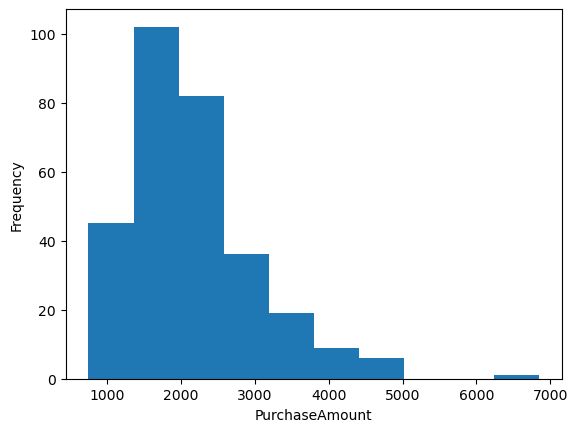

In [15]:
import matplotlib.pyplot as plt

plt.hist(df['PurchaseAmount'])
plt.xlabel('PurchaseAmount')
plt.ylabel('Frequency')
plt.show()

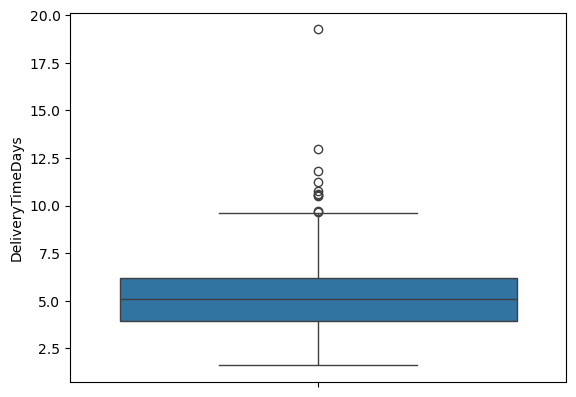

In [17]:
import seaborn as sns
sns.boxplot(df['DeliveryTimeDays'])
plt.show()

In [19]:
print(df['PurchaseAmount'].skew())
print(df['PurchaseAmount'].kurt())

1.3614334876097387
3.094011825322587


In [24]:
sample=df.sample(n=30, random_state=42)
a=sample['PurchaseAmount'].mean()
a

np.float64(1932.7860000000003)

In [28]:
from scipy.stats import norm
import numpy as np

m=df['PurchaseAmount'].mean()
std=df['PurchaseAmount'].std()
n=len('PurchaseAmount')

se=std/np.sqrt(n)

prob=1-norm.cdf(1500,m,se)
prob.round(3)

np.float64(0.997)

In [31]:
# 2 sample

male=df[df['Gender']=='Male']['PurchaseAmount'].dropna()
female=df[df['Gender']=='Female']['PurchaseAmount'].dropna()

from scipy.stats import ttest_ind
stat,p= ttest_ind(male,female)
p.round(3)

np.float64(0.725)

In [33]:
# chi- square

table=pd.crosstab(df['Gender'],df['PurchaseAmount'])

from scipy.stats import chi2_contingency
chi2,p,dof,expected=chi2_contingency(table)
p.round(3)

np.float64(0.473)

#### Question 2

In [34]:
import seaborn as sns

df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [40]:
import numpy as np
from scipy.stats import t

fare_survivors=df[df['survived']==1]['fare'].dropna()

mean=fare_survivors.mean()
std=fare_survivors.std()
n=len(fare_survivors)

se=std/np.sqrt(n)

t_value=t.ppf(0.0975,df=n-1)

lower_value=mean=t_value*se
upper_value=mean+t_value*se
(lower_value,upper_value)

(np.float64(-4.676024256858942), np.float64(-9.352048513717884))

In [41]:
#z test

from statsmodels.stats.proportion import proportions_ztest
successes=110
n=200
p=0.60

z_stat,p=proportions_ztest(successes,n,p)
p

np.float64(0.1552184896846846)

#### Question

In [42]:
import seaborn as sns

df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [43]:
mean=df['sepal_length'].mean()
median=df['sepal_length'].median()
var=df['sepal_length'].var()
std=df['sepal_length'].std()


mean2=df['petal_length'].mean()
median2=df['petal_length'].median()
var2=df['petal_length'].var()
std2=df['petal_length'].std()

print(mean,median,var,std)
print(mean2,median2,var2,std2)

5.843333333333334 5.8 0.6856935123042505 0.8280661279778629
3.7580000000000005 4.35 3.1162778523489942 1.7652982332594667


In [44]:
skew=df['petal_length'].skew()
skew2=df['sepal_length'].skew()

skew, skew2

(np.float64(-0.27488417975101276), np.float64(0.3149109566369728))

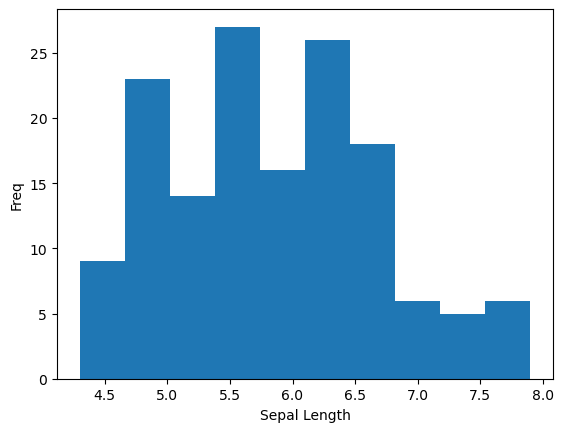

In [45]:
plt.hist(df['sepal_length'])
plt.xlabel('Sepal Length')
plt.ylabel('Freq')
plt.show()

In [46]:
sns.boxplot(df['species'],df['petal_length'])
sns.show()

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

In [48]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [49]:
#One way Anova

from scipy.stats import f_oneway

setosa=df[df['species']=='setosa']['petal_length'].dropna()
versicolor=df[df['species']=='versicolor']['petal_length'].dropna()
virginica=df[df['species']=='virginica']['petal_length'].dropna()

f_stats,p= f_oneway(setosa,versicolor,virginica)
p

np.float64(2.8567766109615584e-91)

In [55]:
# Question

df=sns.load_dataset('titanic')

sample=df['fare'].dropna().sample(n=40,random_state=42)
print(sample)
print(df.head())

709    15.2458
439    10.5000
840     7.9250
720    33.0000
39     11.2417
290    78.8500
300     7.7500
333    18.0000
208     7.7500
136    26.2833
137    53.1000
696     8.0500
485    25.4667
244     7.2250
344    13.0000
853    39.4000
621    52.5542
653     7.8292
886    13.0000
110    52.0000
294     7.8958
447    26.5500
192     7.8542
682     9.2250
538    14.5000
819    27.9000
30     27.7208
673    13.0000
63     27.9000
396     7.8542
877     7.8958
141     7.7500
793    30.6958
235     7.5500
204     8.0500
620    14.4542
23     35.5000
198     7.7500
842    31.0000
739     7.8958
Name: fare, dtype: float64
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  Fi

In [53]:
from scipy.stats import norm

m=df['fare'].mean()
std=df['fare'].std()
n=len('fare')

se=std/np.sqrt(n)

prob=1-norm.cdf(50,mean,se)
prob

np.float64(0.03777069488796092)

In [59]:
fare_survivors=df[df['survived']==1]['fare'].dropna()

from scipy.stats import t

mean=fare_survivors.mean()
std=fare_survivors.std()
n=len('fare_survivors')

se=std/np.sqrt(n)

t_value=t.ppf(0.0975,df=n-1)

lower=mean-t_value*se
upper=mean+t_value*se

lower,upper

(np.float64(72.71469728711861), np.float64(24.076117917559763))

In [ ]:
import pandas as pd

clusters = df['embark_town'].dropna().unique()

chosen_clusters = pd.Series(clusters).sample(2, random_state=42).tolist()
chosen_clusters
cluster_sample = df[df['embark_town'].isin(chosen_clusters)]
cluster_sample.head()
